# 3. Определение параметров модели ARMA(p,q). Построение прогноза временного ряда


Цель: данные временного ряда для любого стационарного процесса (график имеет колебания вдоль горизонтальной прямой, равной среднему значению ряда, в течение некоторого периода) после центрирования (т.е. вычитания среднего) и нормирования (т.е. деления на корень из дисперсии) проверить на соответствие/несоответствие модели ARMA (p,q), используя коррелограмму (графики автокорреляционной и частной автокорреляционной функции с лагами до 10-15 шагов). Дополнительные сведения для этой задачи можно найти по [ссылке](https://studme.org/41017/ekonomika/opredelenie_poryadka_modeli_avtoregressii_skolzyaschey_sredney)
Дополнительно: после определения параметров p и q построить прогноз временного ряда на 3-5 шагов вперед.

Ссылки
- [habr](https://habr.com/ru/post/207160/)
- [лекция](https://github.com/AnastasiyaMax/ML_DPO_2021_spring/blob/a30d463af9958d96eceb757c31ac2223db92761f/class_15/lecture_15_ts.ipynb)
- [семинар](https://github.com/AnastasiyaMax/ML_DPO_2021_spring/blob/a30d463af9958d96eceb757c31ac2223db92761f/class_15/sem15_ts.ipynb)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import pacf, plot_acf, plot_pacf
from statsmodels.tsa import stattools

In [45]:
# акции германии
df1 = pd.read_csv('1.csv').head(100)
df1.tail()

,x
95,0.512722
96,-2.201721
97,2.630771
98,-3.276701
99,4.398196


In [46]:
data_x  = df1

<AxesSubplot:>

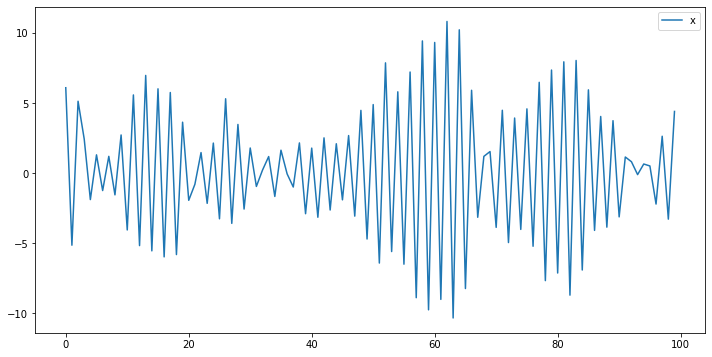

In [47]:
data_x.plot(figsize=(12,6))

In [50]:
time_series = df1.iloc[0,:]

In [51]:
type(time_series)

pandas.core.series.Series

Тренд действительно отсутствует, таким образом ряд первых разностей является стационарным, а наш исходный ряд — интегрированным рядом первого порядка.

3. Установите порядок

Найдите порядок модели AR и модели MA с максимальной точностью. Как правило, ACF (функция автокорреляции) и PACF (функция частичной автокорреляции) используются для определения порядка моделей AR и MA.

Построение модели временного ряда

Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.
Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:

p — порядок компоненты AR
d — порядок интегрированного ряда
q — порядок компонетны MA


Параметр d есть и он равет 1, осталось определить p и q.
Для их определения нам надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.

In [54]:
def get_pdq(time_series):
    plot_acf(time_series)
    plot_pacf(time_series)
    plt.show()

    r,rac,Q = stattools.acf(time_series, qstat=True)
    prac = pacf(time_series, method='ywm')
    table_data = np.c_[range(1,len(r)), r[1:],rac,prac[1:len(rac)+1],Q]
    table = pd.DataFrame(table_data, columns=['lag', "AC","Q", "PAC", "Prob(>Q)"])

    print(table)
    return table

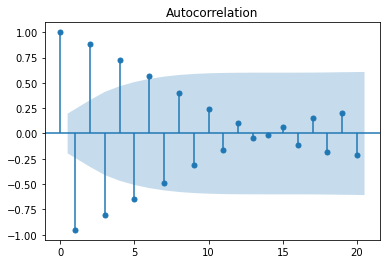

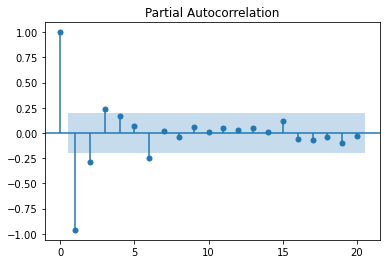

     lag        AC           Q       PAC       Prob(>Q)
0    1.0 -0.952309   93.437490 -0.952309   4.192341e-22
1    2.0  0.885773  175.099384 -0.226834   9.498432e-39
2    3.0 -0.802027  242.739850  0.190548   2.432205e-52
3    4.0  0.725986  298.739492  0.103565   2.026301e-63
4    5.0 -0.650913  344.230230  0.045439   3.056519e-72
5    6.0  0.569513  379.425094 -0.166562   7.389725e-79
6    7.0 -0.485142  405.239079  0.042818   1.794503e-83
7    8.0  0.397739  422.778218 -0.049908   2.501214e-86
8    9.0 -0.314329  433.852842  0.029149   8.100892e-88
9   10.0  0.237438  440.242224 -0.000952   2.517555e-88
10  11.0 -0.165211  443.370359  0.041991   3.708288e-88
11  12.0  0.101611  444.567097  0.016957   1.344843e-87
12  13.0 -0.041173  444.765845  0.041345   7.603054e-87
13  14.0 -0.010445  444.778784  0.010179   4.515326e-86
14  15.0  0.061695  445.235533  0.078589   2.080405e-85
15  16.0 -0.109083  446.680425 -0.040316   5.736954e-85
16  17.0  0.149613  449.431252 -0.025445   8.165

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


In [56]:
table = get_pdq(df1)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля.

По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают.

In [ ]:
p, d, q = 1, 1, 1

In [ ]:
def ts_arma(ts, p, d, q):
    model = ARIMA(ts, order=(p,d,q)).fit()
    print(model.summary())

    return model, model.predict()

In [ ]:
model, result = ts_arma(time_series_diff, p=p,d=d, q=q)

Как видно из данной информации в нашей модели все коэффициенты значимые

In [ ]:
time_series_diff.plot(figsize=(12, 6))
result.plot(style='r--')

In [ ]:
#свойство resid, хранит остатки модели, qstat=True, означает что применяем указынный тест к коэф-ам

q_test = acf(model.resid, qstat=True)
print(pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]}))

Значение данной статистики и p-values, свидетельствуют о том, что гипотеза о случайности остатков отвергается, и скорее всего данный процесс не представляет «белый шум».

In [ ]:
predictions_ARIMA_diff = pd.Series(result, copy=True)
predictions_ARIMA_diff.tail()

In [ ]:
predictions_ARIMA_diff.sum()

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

In [ ]:
time_series.index[0]

In [ ]:
predictions_ARIMA_log = pd.Series(time_series, index=time_series.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

In [ ]:
df1 = predictions_ARIMA_log

In [ ]:
res = pd.concat([data_x, df1], axis=1)

In [ ]:
res = res.rename(columns={'<CLOSE>' : "price"})

In [ ]:
res = res.rename(columns={0 : "priceARIMA"})

In [ ]:
res

In [ ]:
res.plot.line()

ARIMA — это хорошо, но ARIMA — это не все